In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('setup completed')

setup completed


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/global_food_wastage_dataset.csv'
df = pd.read_csv(file_path)

df.head()

df.dtypes

df.isna().sum()

df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.head()

,country,year,food_category,total_waste_(tons),economic_loss_(million_$),avg_waste_per_capita_(kg),population_(million),household_waste_(%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [ ]:
len(df)

5000

In [ ]:
#Searching Outliers
df_numeric = df.select_dtypes(include=[np.number])
Q1, Q3 = np.percentile(df_numeric, [25,75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +1.5 * IQR
outliers = df_numeric[(df_numeric['total_waste_(tons)'] <lower_bound) | (df_numeric['total_waste_(tons)']>upper_bound)]
print(outliers)

      year  total_waste_(tons)  economic_loss_(million_$)  \
3     2023            46299.69                   40551.22   
4     2023            33096.57                   36980.82   
6     2024            45038.72                   39191.25   
10    2024            39478.70                   40087.26   
11    2022            41025.90                   35437.90   
...    ...                 ...                        ...   
4992  2018            48984.17                   49978.44   
4993  2021            42126.64                   36406.75   
4994  2023            39980.40                   37618.45   
4995  2021            47524.74                   48058.40   
4996  2021            32337.72                   32705.08   

      avg_waste_per_capita_(kg)  population_(million)  household_waste_(%)  
3                        120.19                953.05                31.91  
4                        104.74               1105.47                36.06  
6                        179.27     

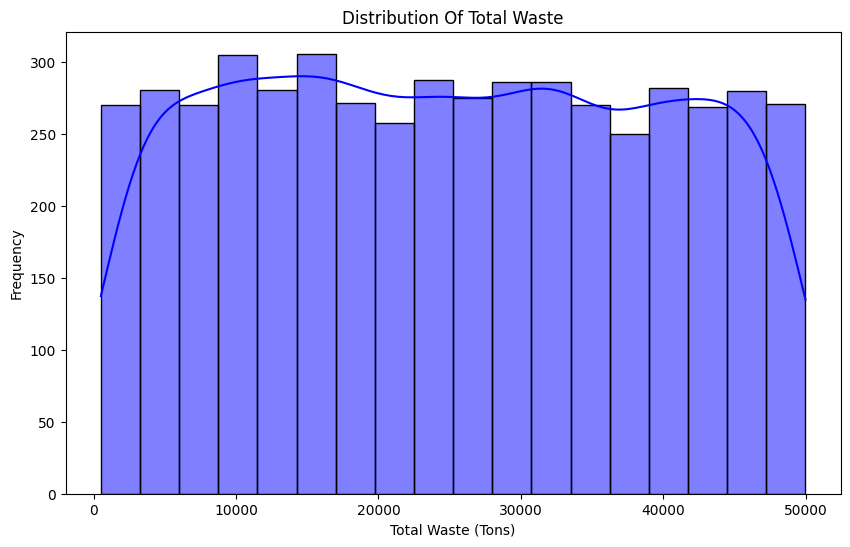

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='total_waste_(tons)',
    kde=True,
    color='blue'
)

plt.xlabel('Total Waste (Tons)')
plt.ylabel('Frequency')
plt.title('Distribution Of Total Waste')
plt.show()


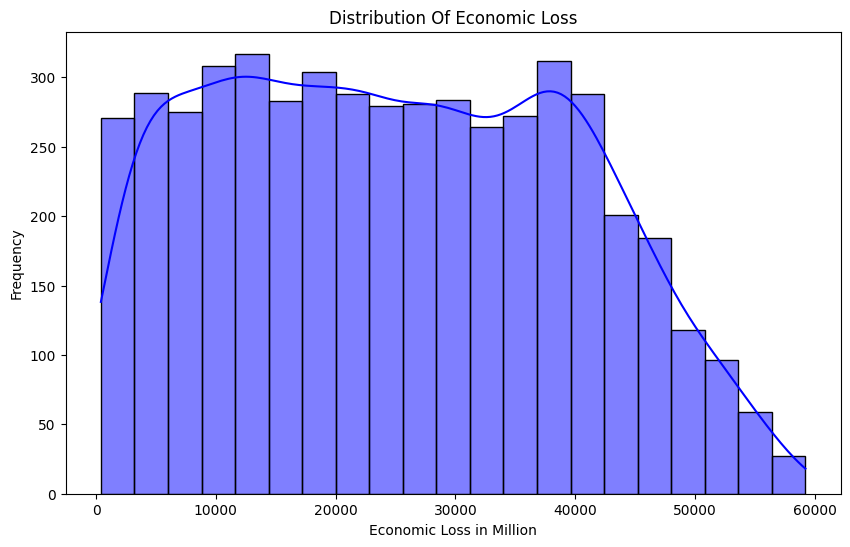

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='economic_loss_(million_$)',
    kde=True,
    color='blue'
)

plt.xlabel('Economic Loss in Million')
plt.ylabel('Frequency')
plt.title('Distribution Of Economic Loss')
plt.show()

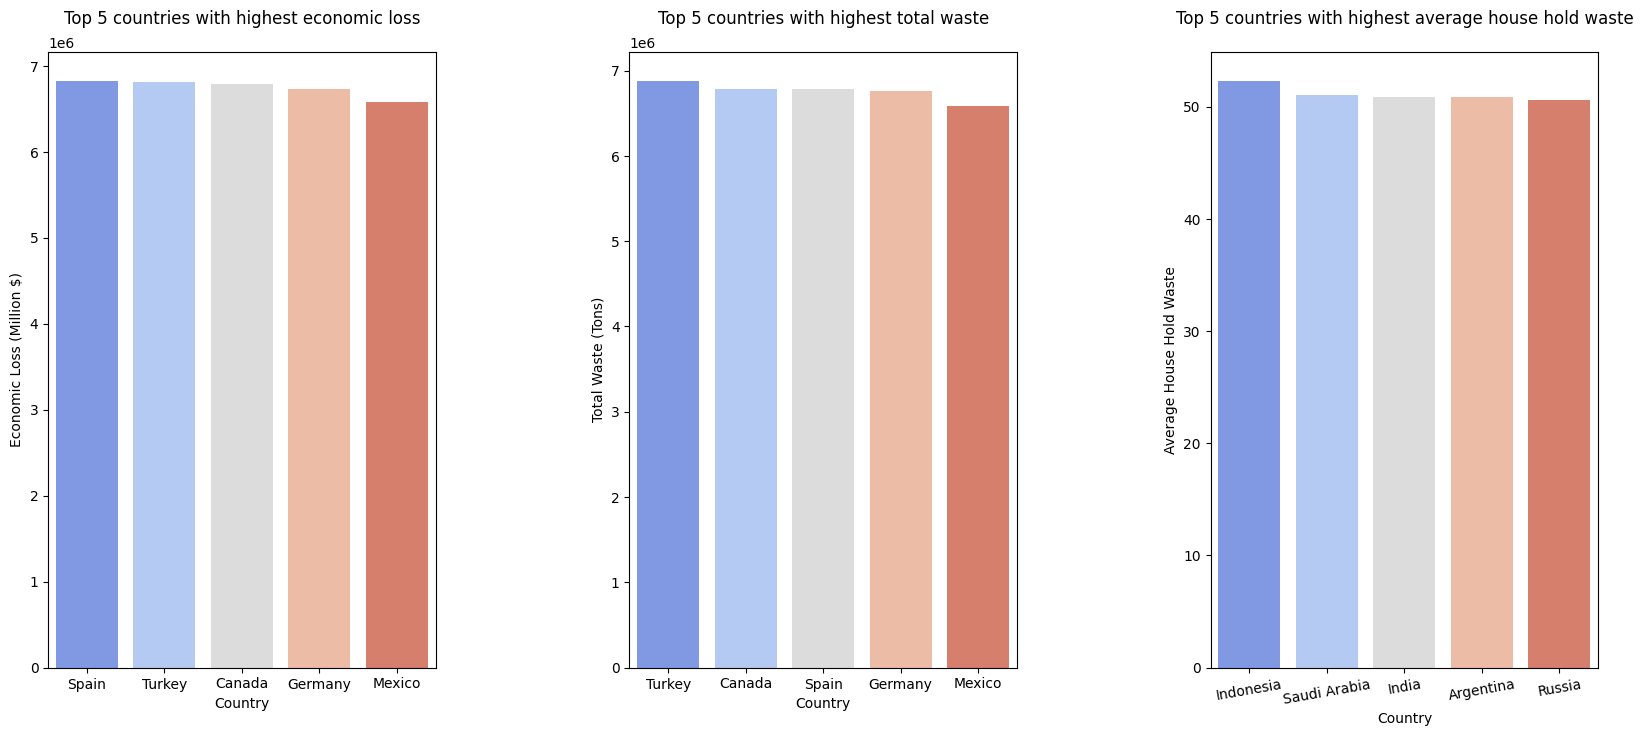

In [ ]:
df_country = df.groupby('country')['total_waste_(tons)'].sum().sort_values(ascending=False).reset_index().head(5)

df_countryM = df.groupby('country')['economic_loss_(million_$)'].sum().sort_values(ascending=False).reset_index().head(5)

df_countryH = df.groupby('country')['household_waste_(%)'].mean().sort_values(ascending=False).reset_index().head(5)

fig, axes = plt.subplots(1,3, figsize=(20,8))

sns.barplot(
    data = df_countryM,
    x = 'country',
    y = 'economic_loss_(million_$)',
    errorbar = None,
    palette = 'coolwarm',
    ax = axes[0]
)

axes[0].set_title('Top 5 countries with highest economic loss', pad = 20)
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Economic Loss (Million $)')

sns.barplot(
    data = df_country,
    x = 'country',
    y = 'total_waste_(tons)',
    errorbar = None,
    palette = 'coolwarm',
    ax = axes[1]
)

axes[1].set_title('Top 5 countries with highest total waste', pad = 20)
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Total Waste (Tons)')


sns.barplot(
    data = df_countryH,
    x = 'country',
    y = 'household_waste_(%)',
    errorbar = None,
    palette = 'coolwarm',
    ax = axes[2]
)

axes[2].set_title('Top 5 countries with highest average house hold waste', pad = 20)
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Average House Hold Waste')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=10)

plt.subplots_adjust(wspace=0.5)
plt.show()

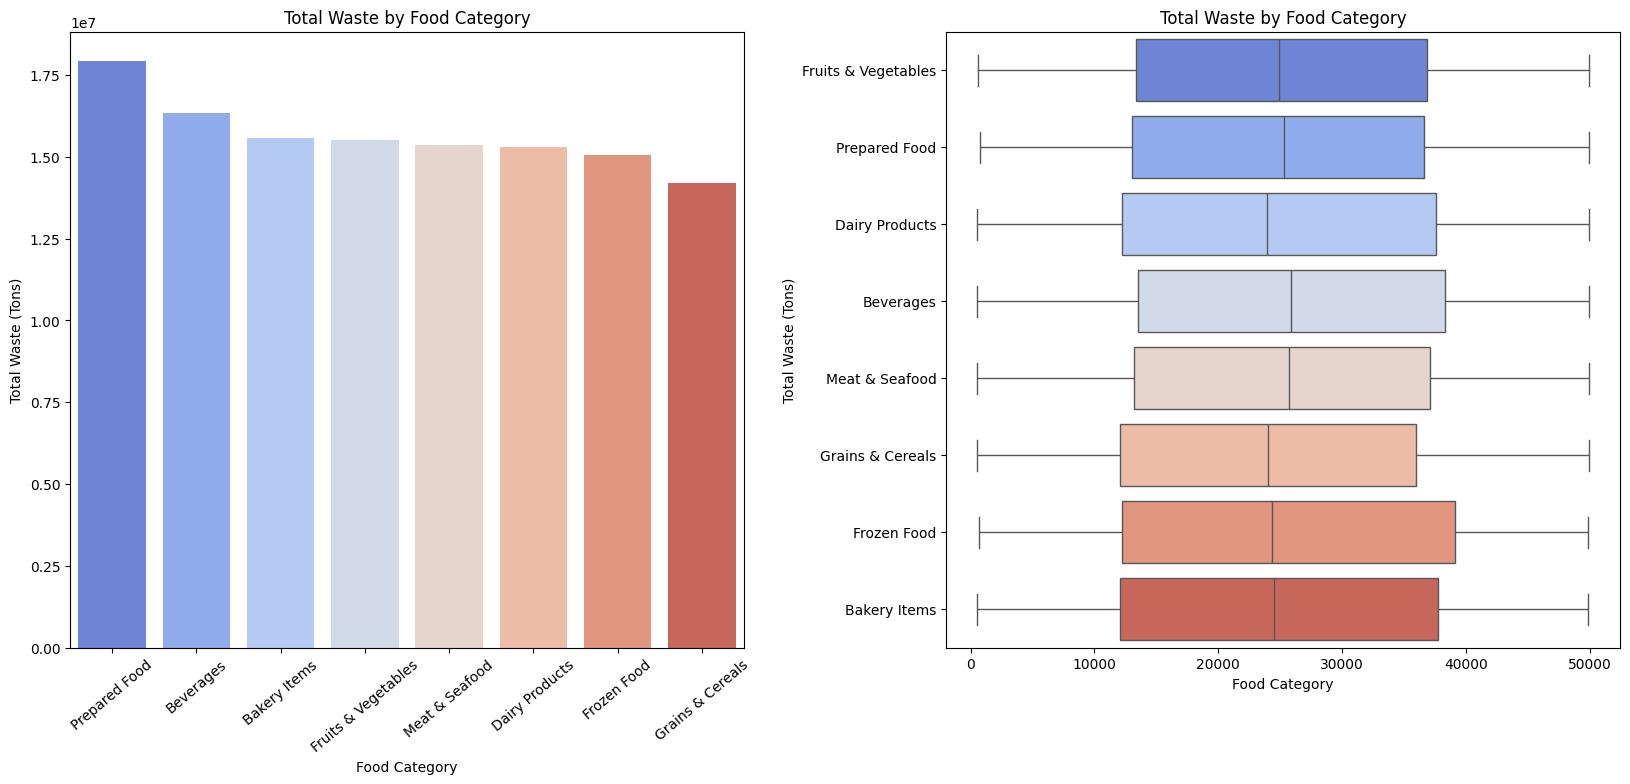

In [ ]:
df_category = df.groupby('food_category')['total_waste_(tons)'].sum().sort_values(ascending=False).reset_index()
fig, axes = plt.subplots(1,2, figsize=(20,8))

sns.barplot(
    data = df_category,
    x = 'food_category',
    y = 'total_waste_(tons)',
    errorbar = None,
    palette = 'coolwarm',
    ax = axes[0]
)

axes[0].set_title('Total Waste by Food Category')
axes[0].set_xlabel('Food Category')
axes[0].set_ylabel('Total Waste (Tons)')
axes[0].set_xticklabels(
    axes[0].get_xticklabels(), rotation=40
)



sns.boxplot(
    data = df,
    x = 'total_waste_(tons)',
    y = 'food_category',
    palette = 'coolwarm',
    ax = axes[1]
)

axes[1].set_title('Total Waste by Food Category')
axes[1].set_xlabel('Food Category')
axes[1].set_ylabel('Total Waste (Tons)')

plt.subplots_adjust(wspace=0.3)
plt.show()

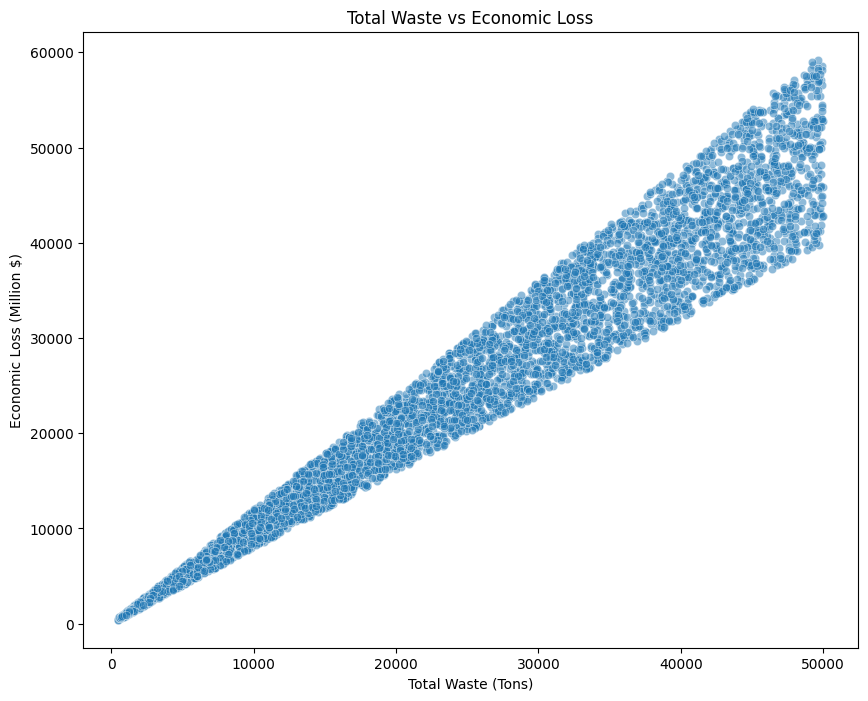

In [ ]:

plt.figure(figsize=(10,8))

sns.scatterplot(
    data = df,
    x = 'total_waste_(tons)',
    y = 'economic_loss_(million_$)',
    alpha=0.5
)

plt.title('Total Waste vs Economic Loss')
plt.xlabel('Total Waste (Tons)')
plt.ylabel('Economic Loss (Million $)')
plt.show()

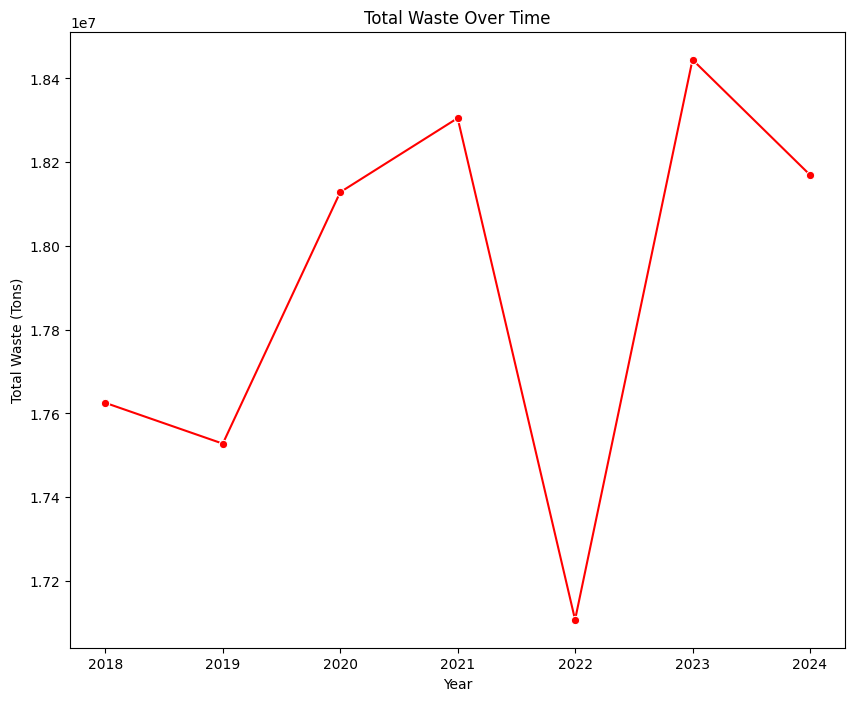

In [ ]:
df_time = df.groupby('year')['total_waste_(tons)'].sum().reset_index().sort_values(by='year')

plt.figure(figsize=(10,8))
sns.lineplot(
    data = df_time,
    x = 'year',
    y = 'total_waste_(tons)',
    color = 'red',
    marker = 'o'
)

plt.title('Total Waste Over Time')
plt.xlabel('Year')
plt.ylabel('Total Waste (Tons)')
plt.show()

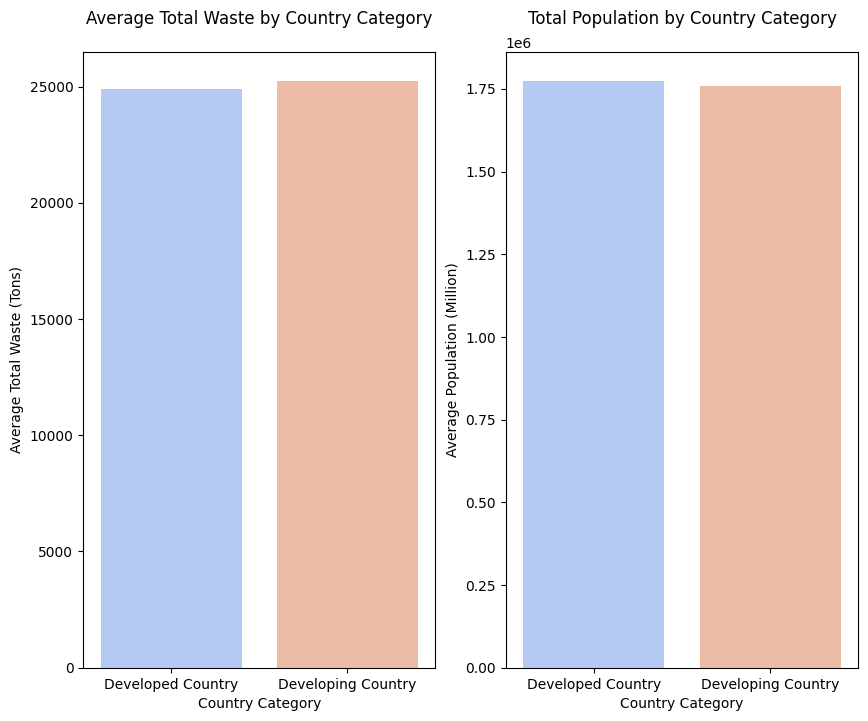

<Figure size 1000x800 with 0 Axes>

In [ ]:
df['country'].unique()

def developed_countries (i):
  return 'Developed Country' if i in ['Australia', 'Germany', 'France', 'UK', 'Japan', 'USA','Canada', 'South Korea', 'Italy', 'Spain'] else 'Developing Country'

df['country_category'] = df['country'].apply(developed_countries)
df['country_category'].value_counts()

fig, axes = plt.subplots(1,2, figsize=(10,8))
sns.barplot(
    data = df,
    x = 'country_category',
    y = 'total_waste_(tons)',
    errorbar = None,
    estimator = np.mean,
    palette = 'coolwarm',
    ax = axes[0]
)

axes[0].set_title('Average Total Waste by Country Category', pad = 20)
axes[0].set_xlabel('Country Category')
axes[0].set_ylabel('Average Total Waste (Tons)')


plt.figure(figsize=(10,8))
sns.barplot(
    data = df,
    x = 'country_category',
    y = 'population_(million)',
    estimator = np.sum,
    errorbar = None,
    palette = 'coolwarm',
    ax = axes[1]
)

axes[1].set_title('Total Population by Country Category', pad = 20)
axes[1].set_xlabel('Country Category')
axes[1].set_ylabel('Average Population (Million)')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
#pt2
print(df[['population_(million)', 'total_waste_(tons)', 'economic_loss_(million_$)']].corr())
print(df[['population_(million)', 'total_waste_(tons)', 'economic_loss_(million_$)']].corr(method='spearman'))

                           population_(million)  total_waste_(tons)  \
population_(million)                   1.000000            0.024048   
total_waste_(tons)                     0.024048            1.000000   
economic_loss_(million_$)              0.022253            0.974522   

                           economic_loss_(million_$)  
population_(million)                        0.022253  
total_waste_(tons)                          0.974522  
economic_loss_(million_$)                   1.000000  
                           population_(million)  total_waste_(tons)  \
population_(million)                   1.000000            0.024156   
total_waste_(tons)                     0.024156            1.000000   
economic_loss_(million_$)              0.023417            0.978929   

                           economic_loss_(million_$)  
population_(million)                        0.023417  
total_waste_(tons)                          0.978929  
economic_loss_(million_$)                   1

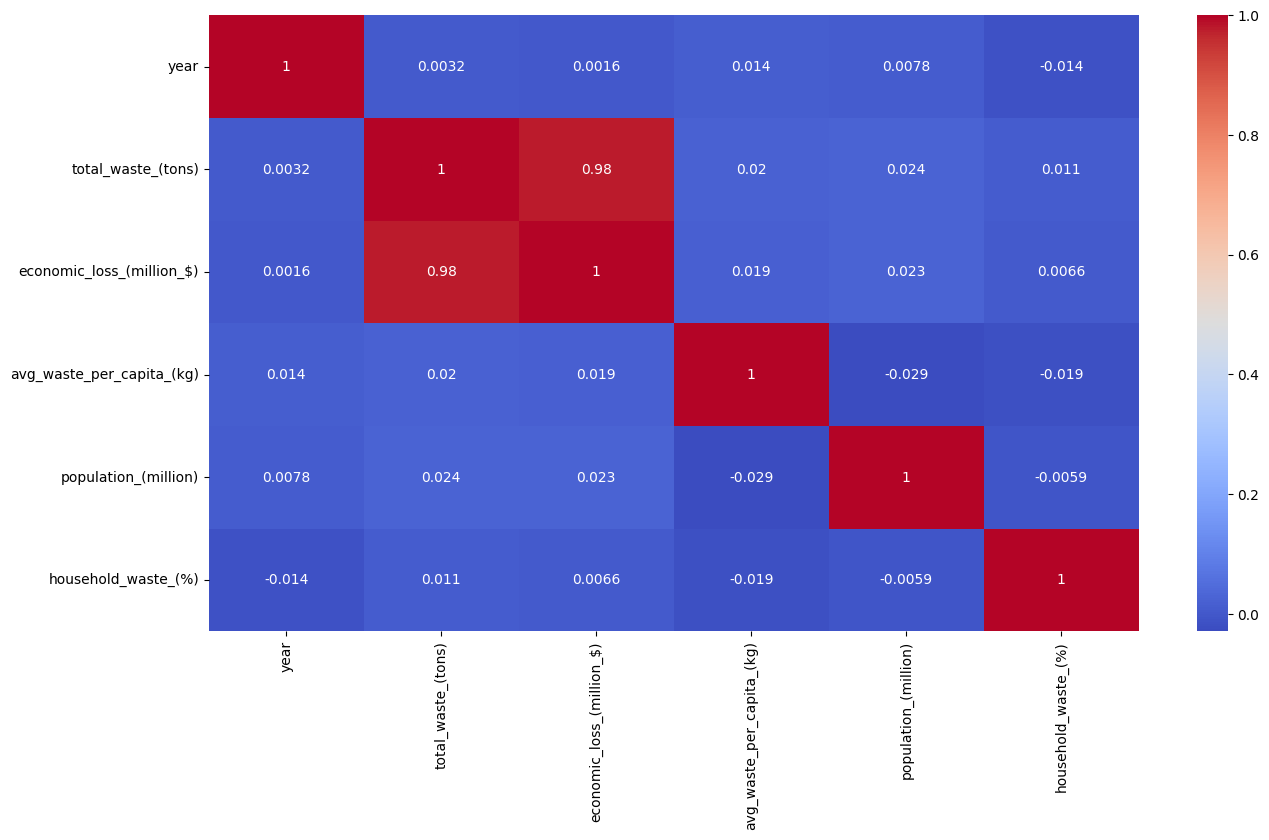

In [ ]:
df_numeric_col = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15,8))
sns.heatmap(
    df_numeric_col.corr(method='spearman'),
    annot = True,
    cmap = 'coolwarm'
)
plt.show()

In [ ]:
df.head()

,country,year,food_category,total_waste_(tons),economic_loss_(million_$),avg_waste_per_capita_(kg),population_(million),household_waste_(%),country_category
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64,Developed Country
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61,Developing Country
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08,Developed Country
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91,Developed Country
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06,Developed Country


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

feature_columns = ['total_waste_(tons)', 'avg_waste_per_capita_(kg)', 'population_(million)', 'household_waste_(%)']

y = df['economic_loss_(million_$)']
x = df[feature_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.95


In [ ]:
feature_columns2 = ['economic_loss_(million_$)', 'avg_waste_per_capita_(kg)', 'population_(million)', 'household_waste_(%)']

y = df['total_waste_(tons)']
x = df[feature_columns2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 1.00


In [ ]:
from sklearn.ensemble import RandomForestRegressor

feature_columns = ['total_waste_(tons)', 'avg_waste_per_capita_(kg)', 'population_(million)', 'household_waste_(%)']

y = df['economic_loss_(million_$)']
x = df[feature_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.94
